In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.api as sm
import datetime

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data = data.dropna()

In [5]:
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [6]:
split_1 = int(len(data)* .6)
split_2 = int(len(data)* .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [18]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]


In [19]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [20]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [21]:
import matplotlib.pyplot as plt

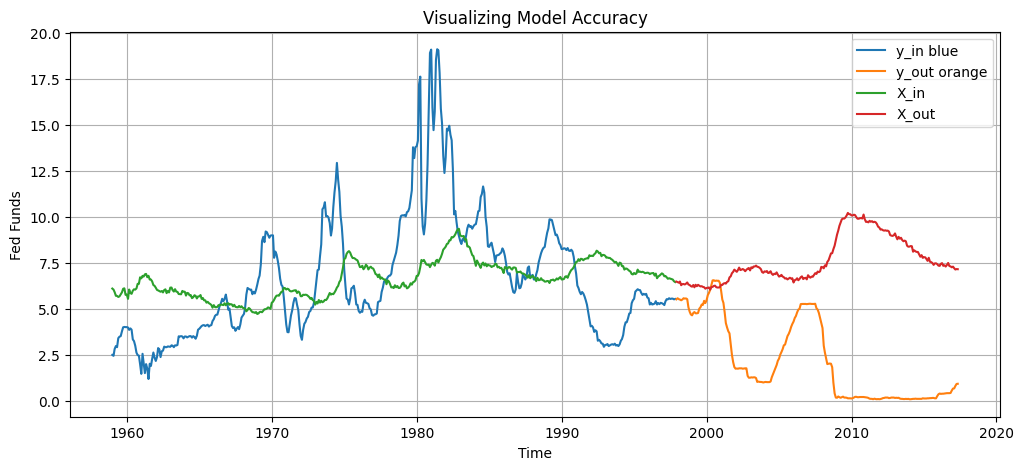

In [22]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(['y_in blue', 'y_out orange', 'X_in','X_out'])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [25]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835668566


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
max_d = 3
d = 2

In [28]:
poly = PolynomialFeatures(degree = d)
X_in_poly = poly.fit_transform(X_in)
X_in_poly = poly.fit_transform(X_out)

In [29]:
X_in_poly = poly.fit_transform(X_in)
X_in_poly = poly.fit_transform(X_out)

DEGREE: 1


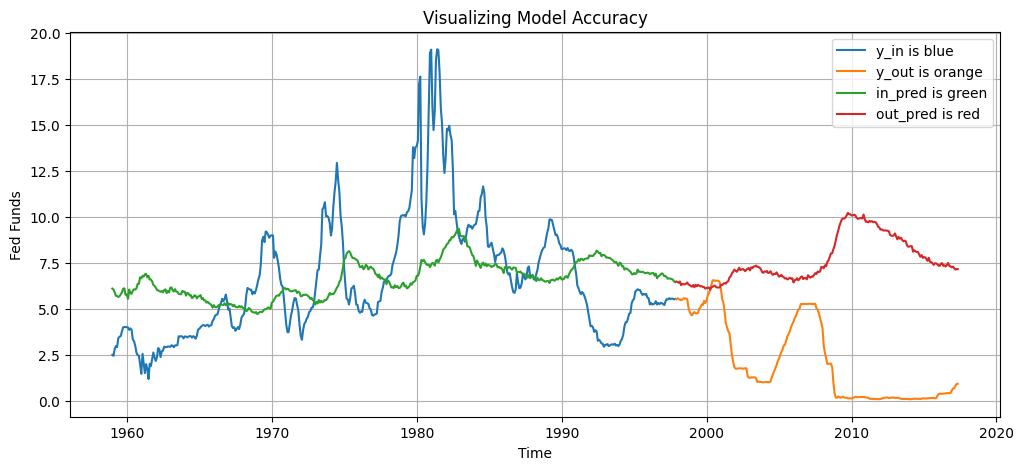

Insample MSE: 10.071422013168641
Outsample MSE: 40.36082783565212

DEGREE: 2


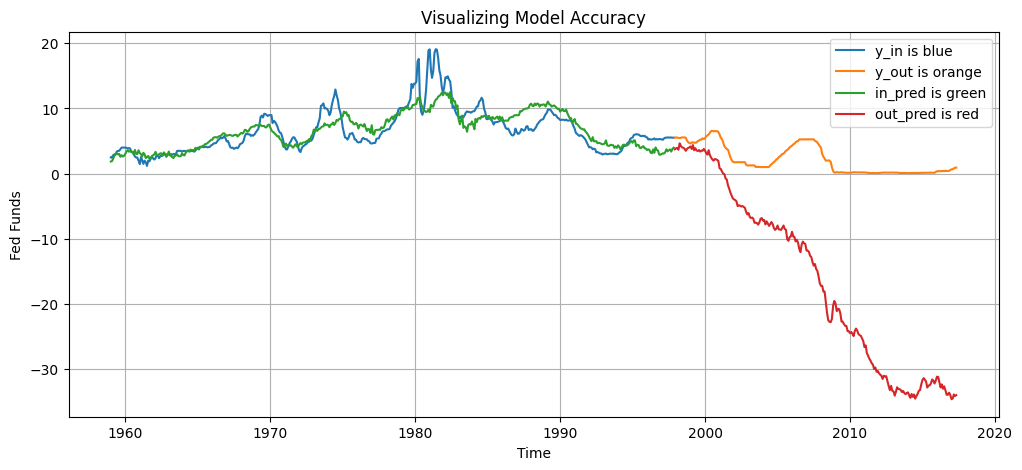

Insample MSE: 3.863477139276067
Outsample MSE: 481.4465099024015

DEGREE: 3


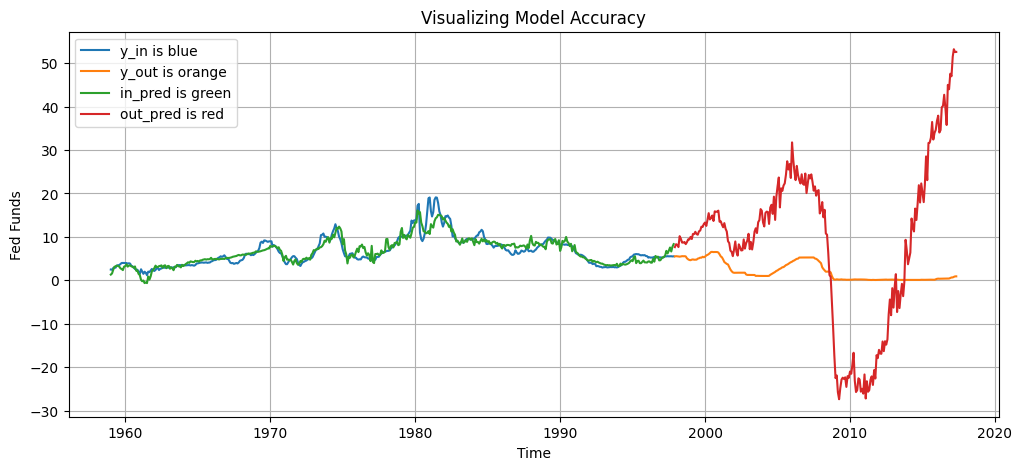

Insample MSE: 1.872363628831326
Outsample MSE: 371.7672613994206



In [33]:
for d in range(1,max_d+1):
    print('DEGREE:', d)
    poly = PolynomialFeatures(degree = d)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    
    ###
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([ "y_in is blue", "y_out is orange", "in_pred is green", "out_pred is red"])
    plt.grid()
    plt.show()
    
    in_mse1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    print('Insample MSE:', in_mse1)
    print('Outsample MSE:', out_mse_1)
    print('')

# 7.) State your observations :

According to the model performances and the MSE (mean-squared error), the best degree model seems to be the first degree model. Its error is approximately 40, which is lower than the other two degree orders. The data in the third degree model is overfitted and it is shown when the out data is being predicted on. This is noticeable when the predictions differ dramatically rom the actual data. This shows how higher complexity can decrease accuracy as the predictions shift more dramatically and over predict on smaller changes. 